In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
player_data <- read_csv("https://raw.githubusercontent.com/PraiseBeTheSun/DSCI-100-GROUP-PROJECT/refs/heads/main/data/players.csv")
session_data <- read_csv("https://raw.githubusercontent.com/PraiseBeTheSun/DSCI-100-GROUP-PROJECT/refs/heads/main/data/sessions.csv")

player_data <- player_data |>
mutate(subscribe = as.factor(subscribe),
       gender = as.factor(gender),
       experience = as.factor(experience))

player_means <- player_data |>
summarize(mean_played_hours = mean(played_hours, na.rm = TRUE),
          mean_age = mean(Age, na.rm = TRUE))

player_means |>
pivot_longer(cols = c(mean_played_hours, mean_age), names_to = "variable", values_to = "mean_value")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


variable,mean_value
<chr>,<dbl>
mean_played_hours,5.845918
mean_age,21.139175


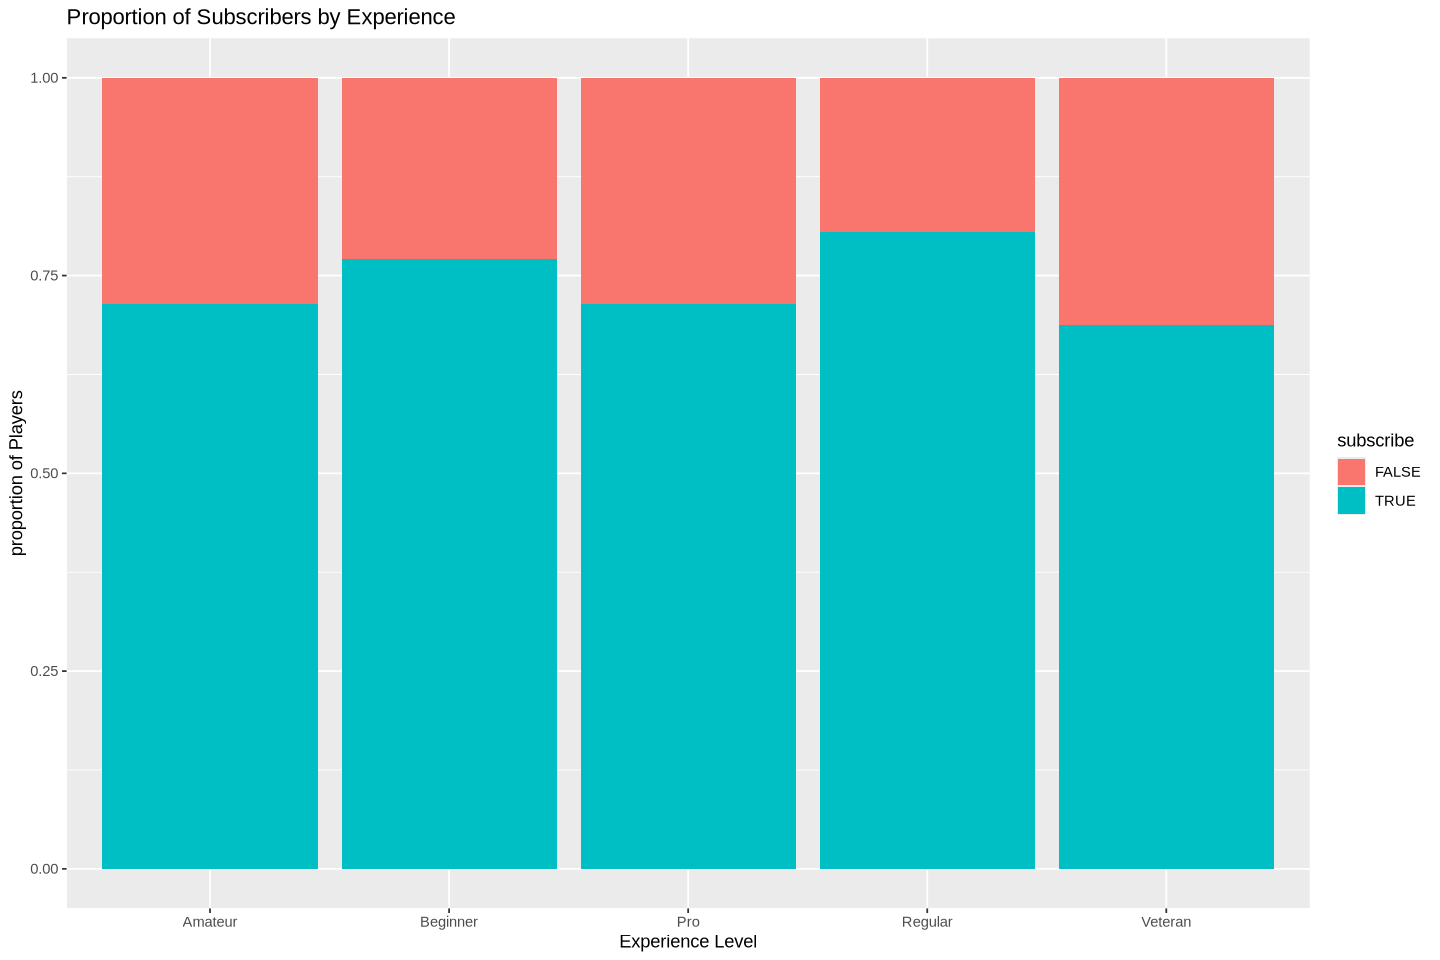

In [3]:
options(repr.plot.width = 12, repr.plot.height = 8)
ggplot(player_data, aes(x = experience, fill = subscribe)) +
geom_bar(position = "fill") +
labs(title = "Proportion of Subscribers by Experience", x = "Experience Level", y = "proportion of Players")

Summary Table

In [4]:
summary_table <- player_data |>
  summarize(
    n_players = n(),
    mean_age = mean(Age, na.rm = TRUE),
    median_age = median(Age, na.rm = TRUE),
    subscribe_rate = sum(subscribe == "TRUE") / n(),
    mean_hours_sub = mean(played_hours[subscribe == TRUE], na.rm = TRUE),
    mean_hours_nosub = mean(played_hours[subscribe == FALSE], na.rm = TRUE))
summary_table

n_players,mean_age,median_age,subscribe_rate,mean_hours_sub,mean_hours_nosub
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
196,21.13918,19,0.7346939,7.775694,0.5019231


Age vs Subscription

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


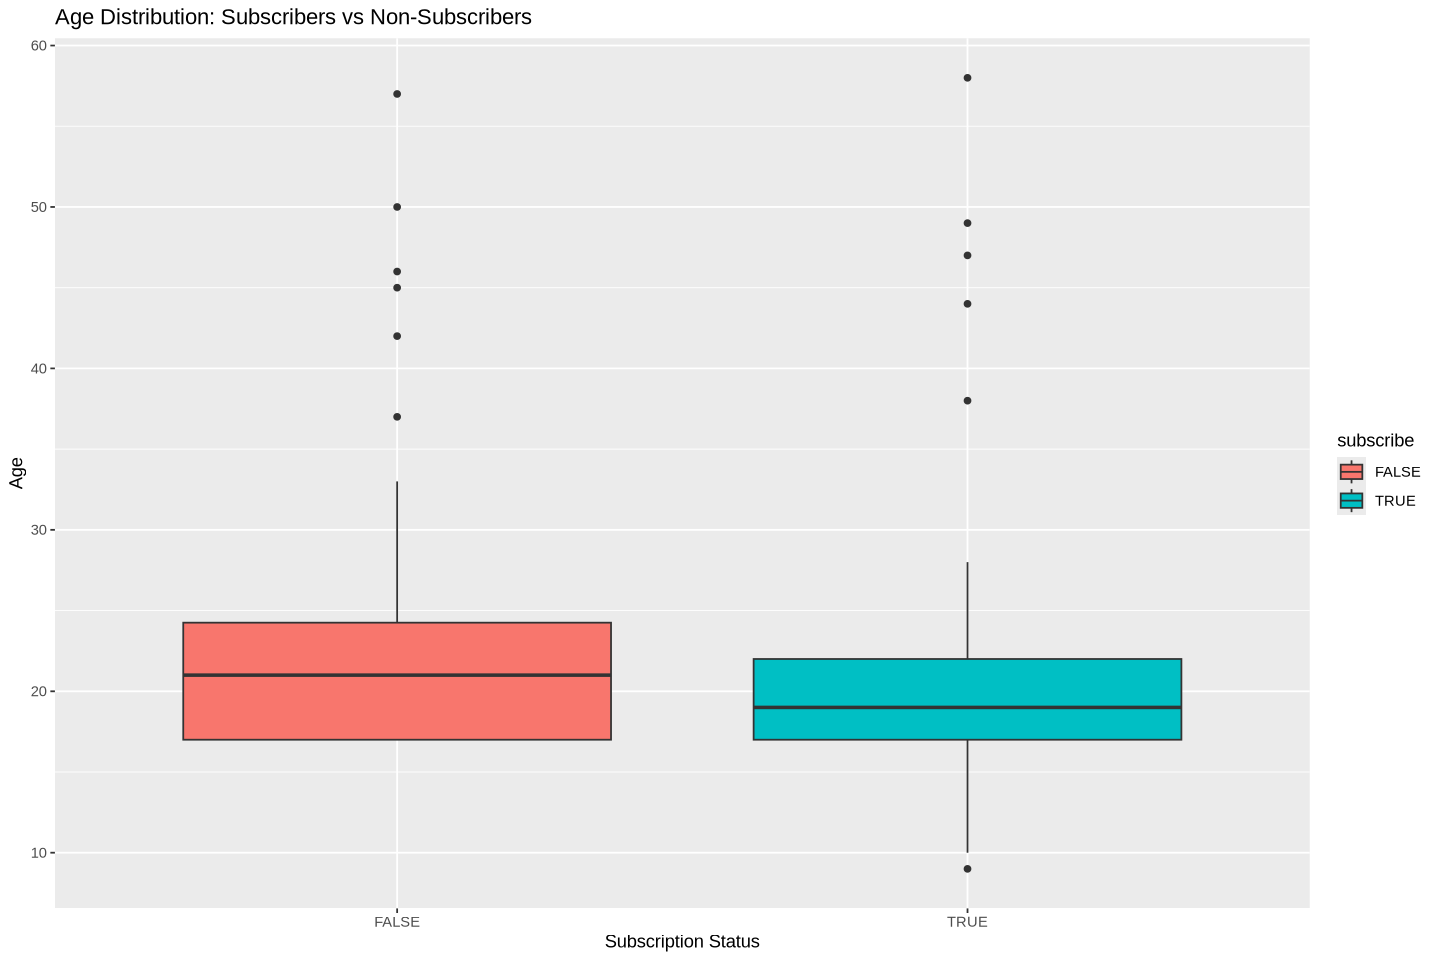

In [5]:
ggplot(player_data, aes(x = subscribe, y = Age, fill = subscribe)) +
  geom_boxplot() +
  labs(title = "Age Distribution: Subscribers vs Non-Subscribers",
       x = "Subscription Status",
       y = "Age")

Experience vs Subscription — Count Plot

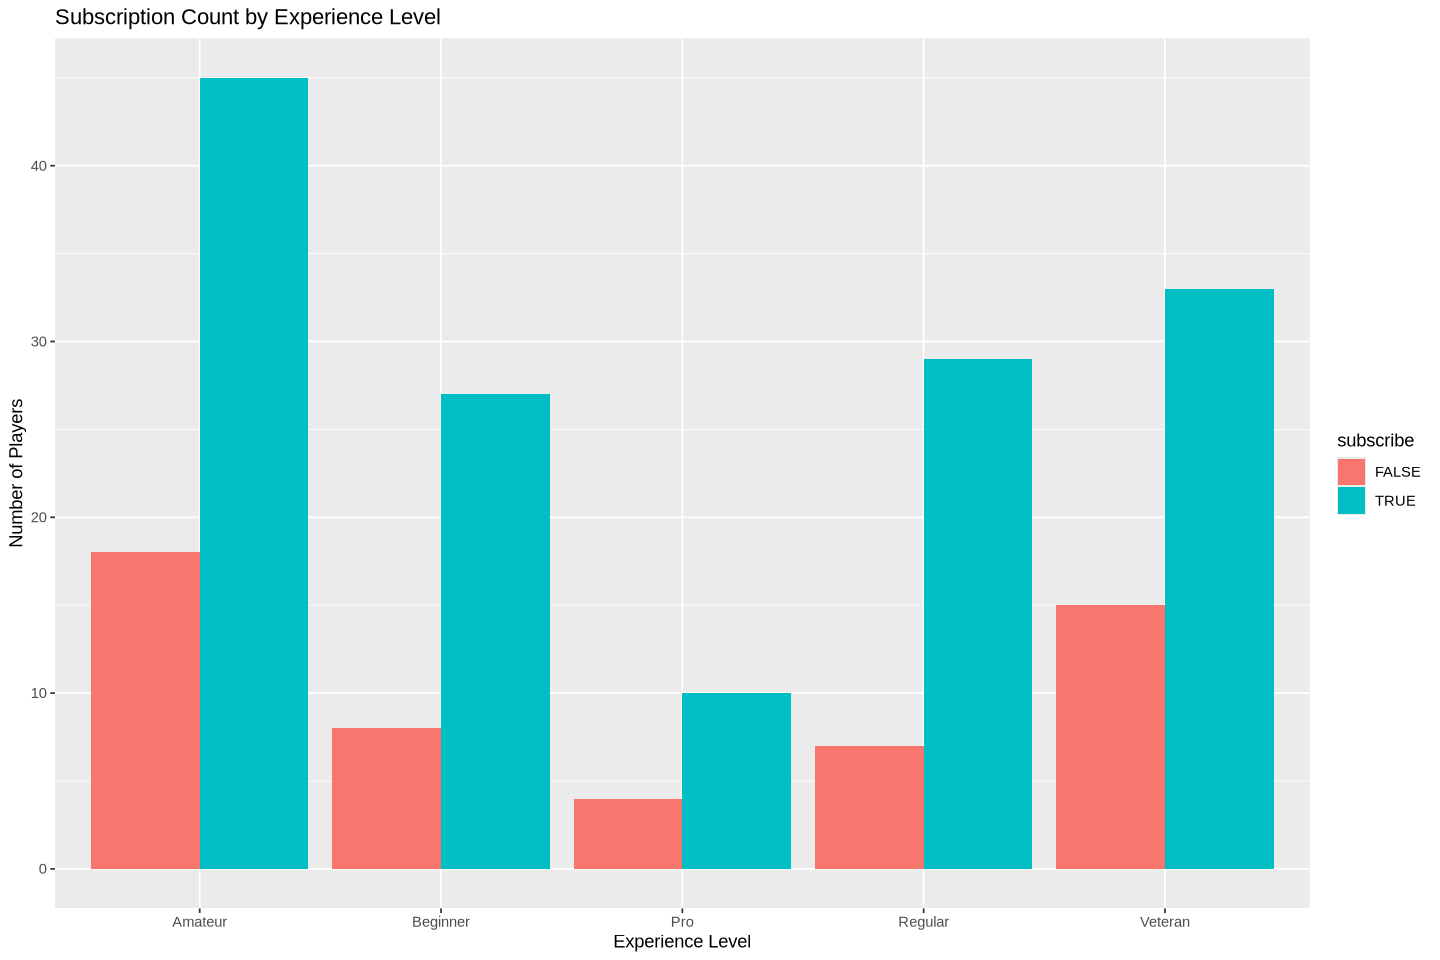

In [6]:
ggplot(player_data, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(title = "Subscription Count by Experience Level",
       x = "Experience Level",
       y = "Number of Players")